In [1]:
import os

# Çalışma dizinini tangible klasörüne ayarla
os.chdir('..')

# Şu anki çalışma dizinini kontrol et
print(os.getcwd())


c:\Users\musta\Documents\Python Projects\tangible


In [2]:
# Data Frames
from src.data_loader import load_data
from src.data_loader import load_data, load_data_with_delimiter
from src.data_analysis import create_themes
from src.themes_tangible import themes

# Load data
#df = load_data('data/tangible-uoek.csv')
df = load_data_with_delimiter('data/tangible-uoek.csv', delimiter=';')

# İlk birkaç satırı görüntüle
df.head()

# Tema için DF'yi tanımlama
themes_df = create_themes(df, themes.theme_prefixes, themes.theme_names, themes.subtheme_prefixes, themes.subtheme_names)
# Verileri artan sıraya göre sıralama
themes_df = themes_df.sort_values(by=['tag', 'document'], ascending=True)
# Sütunları sıralama
themes_df = themes_df[['theme', 'subtheme', 'tag', 'document', 'content']]
# Yeni sütunları kontrol etme
themes_df.head()


,theme,subtheme,tag,document,content
173,1. Kullanım,1a. Deneyim/bilgi,1a. Akademik kaynak,O2.docx,Evet hizmet içi eğitimden. Öğretmen arkadaşlar...
713,1. Kullanım,1a. Deneyim/bilgi,1a. Akademik kaynak,O6.docx,Semboller hakkında aldığımız bilgiyi üniversit...
784,1. Kullanım,1a. Deneyim/bilgi,1a. Akademik kaynak,O9.docx,Sembollerle ilgili bilgileri öğretmenlik hayat...
126,1. Kullanım,1a. Deneyim/bilgi,1a. Deneyim,O1.docx,yani bir de bizim sınıfımız en eski sınıf bura...
656,1. Kullanım,1a. Deneyim/bilgi,1a. Deneyim,O5.docx.docx,Öğretmen. 10 yıl ve üzeri. Görme engelliler öğ...


In [3]:
# Üst kategoriye göre gruplandırma ve içeriklerin listesini oluşturma
#grouped_content = df.groupby('subtheme')['tag'].apply(list)
# Sonuçları inceleme
#print(grouped_content)

# 'document' sütununu 'content' sütunundan önce olacak şekilde gruplama işlemi yapma
#grouped_df = df.groupby(['subtheme', 'tag', 'document'])['content'].apply(lambda x: ' '.join(x)).reset_index()

# Sütunların sırasını yeniden düzenleme
#grouped_df = grouped_df[['subtheme', 'tag', 'document', 'content']]
# Sonucu kontrol etme#print(grouped_df.head())

# Frekans Verisi
# 'subtheme' sütununda "a. Deneyim" ve "b. Sembol Türü" olan satırları filtreleme
#filtered_df = df[df['subtheme'].isin(['a. Deneyim', 'b. Sembol Türü'])]
# Frekans verisini oluşturma
#frequency_df = filtered_df.groupby(['document', 'subtheme', 'tag']).size().reset_index(name='f')
#print(frequency_df)
#frequency_df = df.groupby(['document', 'subtheme', 'tag']).size().reset_index(name='f')
#frequency_df = df.groupby(['document', 'subtheme'=='a. Sembol Türü', 'tag']).size().reset_index(name='f')
# Sonucu kontrol etme
#print(frequency_df.head())

# Pivot tablo oluşturma
#pivot_table = frequency_df.pivot_table(index='document', columns='subtheme', values='f', aggfunc='sum', fill_value=0)
# Pivot tabloyu kontrol etme
#print(pivot_table)


c:\Users\musta\Documents\Python Projects\tangible\src\visualization.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column_name, hue=hue, palette=palette, order=order, hue_order=hue_order)


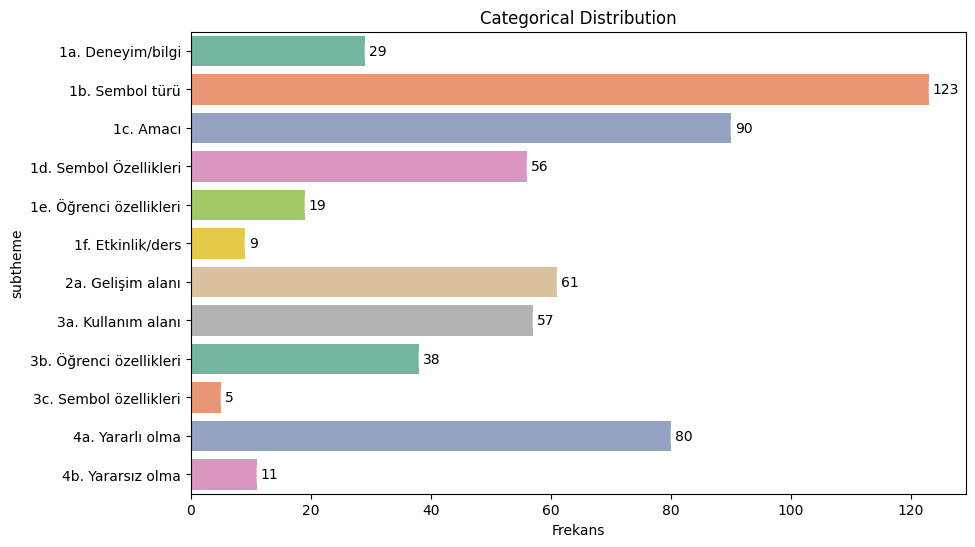

subtheme
1b. Sembol türü            123
1c. Amacı                   90
1d. Sembol Özellikleri      56
1a. Deneyim/bilgi           29
1e. Öğrenci özellikleri     19
1f. Etkinlik/ders            9
Name: count, dtype: int64
subtheme
3a. Kullanım alanı         57
3b. Öğrenci özellikleri    38
3c. Sembol özellikleri      5
Name: count, dtype: int64


c:\Users\musta\Documents\Python Projects\tangible\src\visualization.py:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='f', y=column_y, data=frequency_df, orient='h', palette=palette, width=0.7)


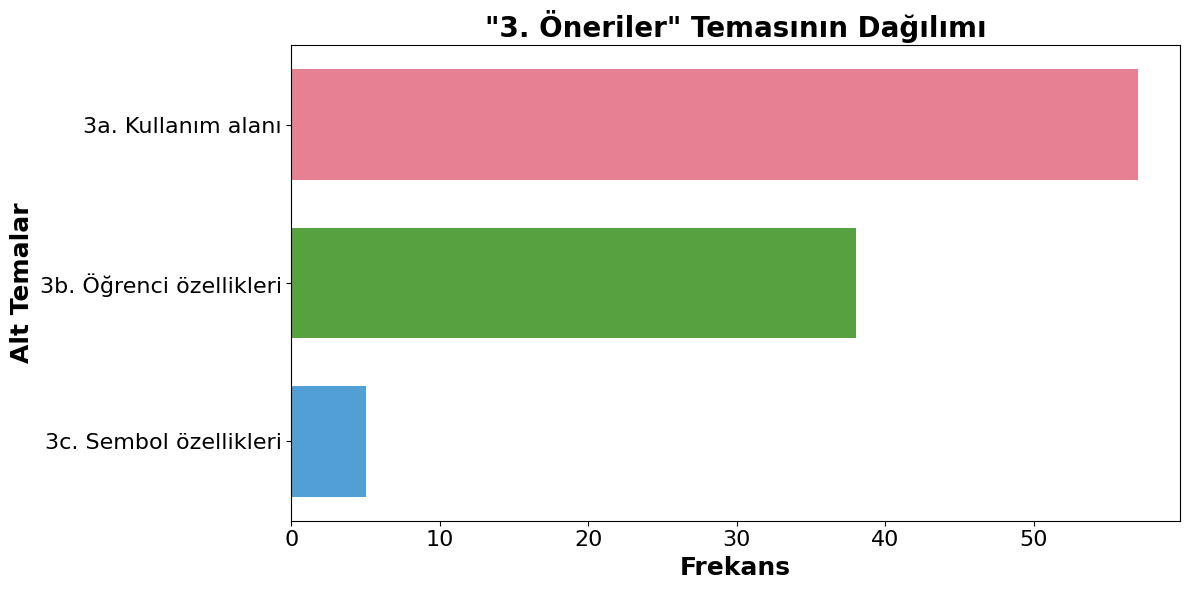

C:\Users\musta\AppData\Local\Temp\ipykernel_2408\3723503894.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theme3x_df['tag'] = theme3x_df['tag'].str.removeprefix('3b. ')
c:\Users\musta\Documents\Python Projects\tangible\src\visualization.py:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='f', y=column_y, data=frequency_df, orient='h', palette=palette, width=0.7)


tag
Çoklu yetersizlik                 9
Dil ve iletişim güçlükleri        7
Görme yetersizliği                5
Yaş ve gelişim özellikleri        4
Otizm                             3
Kişisel ilgi                      3
Öğrenci özellik/gereksinimleri    2
Zihinsel yetersizlik              2
İşitme yetersizliği               2
Fiziksel yetersizlik              1
Name: count, dtype: int64


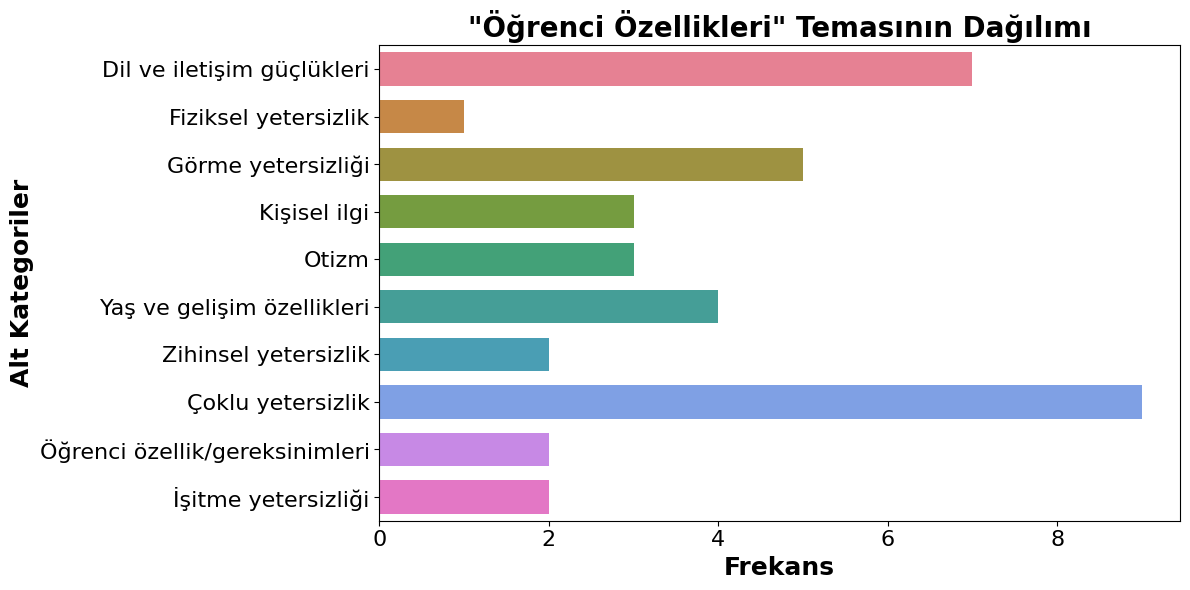

In [10]:
# Visualization
from src.visualization import plot_categorical_distribution, plot_numerical_distribution, plot_crosstab, plot_scatter, plot_frequency_bar, plot_frequency_heatmap, create_frequency_bar_tangible, create_table, create_striped_table
#import matplotlib.pyplot as plt
#import seaborn as sns

# Hedef sütunun dağılımı
plot_categorical_distribution(themes_df, column_name='subtheme')


# (UOEK 2024) İstatistikler
# Temaların dağılımı

#create_frequency_bar_tangible(themes_df, column_y='theme', y_label='Temalar', title='Temaların Dağılımı', show_frequency=False)
#create_frequency_bar_tangible(themes_df, column_y='subtheme', y_label='Temalar', title='Temaların Dağılımı')
# Tabloyu oluşturma
#create_table(themes_df, column_y='theme', y_label='Temalar', title='Temaların Dağılımı')
#create_striped_table(themes_df, column_y='theme', y_label='Temalar', title='Temaların Dağılımı')
# Tema 1 için
theme1_df = themes_df.loc[themes_df['theme'].str.startswith('1. Kullanım')]
print(theme1_df['subtheme'].value_counts())
#create_frequency_bar_tangible(theme1_df, column_y='subtheme', y_label='Alt Temalar', title='"1. Kullanım" Temasının Dağılımı')
# Tema 1'in alt temaları için
#theme1x_df = themes_df.loc[themes_df['tag'].str.startswith('1a')]
#theme1x_df['tag'] = theme1x_df['tag'].str.removeprefix('1a. ')
#theme1x_df.head()
#print(theme1x_df['tag'].value_counts())
#create_frequency_bar_tangible(theme1x_df, column_y='tag', y_label='Alt Kategoriler', title='"Deneyim/Bilgi Düzeyi" Temasının Dağılımı')
# Tema 2 için
#theme2_df = themes_df.loc[themes_df['tag'].str.startswith('2a')]
#theme2_df.head()
#print(theme2_df['tag'].value_counts())
#create_frequency_bar_tangible(theme2_df, column_y='tag', y_label='Alt Temalar', title='"2. Gelişim Alanları" Temasının Dağılımı')
# Tema 3 için
theme3_df = themes_df.loc[themes_df['theme'].str.startswith('3.')]
theme3_df.head()
print(theme3_df['subtheme'].value_counts())
create_frequency_bar_tangible(theme3_df, column_y='subtheme', y_label='Alt Temalar', title='"3. Öneriler" Temasının Dağılımı')
# Tema 3'ün alt temaları için
theme3x_df = themes_df.loc[themes_df['tag'].str.startswith('3b')]
theme3x_df['tag'] = theme3x_df['tag'].str.removeprefix('3b. ')
theme3x_df.head()
print(theme3x_df['tag'].value_counts())
create_frequency_bar_tangible(theme3x_df, column_y='tag', y_label='Alt Kategoriler', title='"Öğrenci Özellikleri" Temasının Dağılımı')
# Tema 4 için
#theme4_df = themes_df.loc[themes_df['theme'].str.startswith('4.')]
#theme4_df.head()
#print(theme4_df['subtheme'].value_counts())
#create_frequency_bar_tangible(theme4_df, column_y='subtheme', y_label='Alt Temalar', title='"4. Kullanımın Etkileri" Temasının Dağılımı')
# Tema 4a için
#theme4a_df = themes_df.loc[themes_df['tag'].str.startswith('4a')]
#theme4a_df['tag'] = theme4a_df['tag'].str.removeprefix('4a. ')
#theme4a_df.head()
#print(theme4a_df['tag'].value_counts())
#create_frequency_bar_tangible(theme4a_df, column_y='tag', y_label='Alt Kategoriler', title='"Yararlı Olma" Temasının Dağılımı')
# Tema 4b için
#theme4b_df = themes_df.loc[themes_df['tag'].str.startswith('4b')]
#theme4b_df['tag'] = theme4b_df['tag'].str.removeprefix('4b.')
#theme4b_df.head()
#print(theme4b_df['tag'].value_counts())
#create_frequency_bar_tangible(theme4b_df, column_y='tag', y_label='Alt Kategoriler', title='"Yararsız Olma" Temasının Dağılımı')

# Dağılım grafiği
#plot_numerical_distribution(frequency_df, column_name='document', title='Title')

# Sıklık grafiğini çizme
#plot_frequency_bar(frequency_df)
#plot_frequency_bar(themes_df.groupby(['subtheme']).size().reset_index(name='f'))

In [5]:
# Results
#from src.visualization import plot_categorical_distribution, plot_numerical_distribution, plot_crosstab, plot_scatter, plot_frequency_bar, plot_frequency_heatmap

# Şu anki çalışma dizinini kontrol et
#print(os.getcwd())
# results klasörünün mevcut olup olmadığını kontrol et
#print(os.path.exists('results'))

# PNG 
#plot_categorical_distribution(df, column_name='tag', title="Distribution of Tags", save_path='results/tag_distribution.png')

# CSV olarak kaydetme
#grouped_df.to_csv('results/theme1.csv', index=False)
# Excel olarak kaydetme
#grouped_df.to_excel('results/theme1.xlsx', index=False)

# Frequency
# CSV olarak kaydetme
#frequency_df.to_csv('results/frequency_analysis.csv', index=False)
# Excel olarak kaydetme
#frequency_df.to_excel('results/frequency_analysis.xlsx', index=False)

# Temalar ve alt temalar
#themes_df.to_excel('results/themes.xlsx', index=False)
